In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import norm
import matplotlib.mlab as mlab
import statsmodels.api as sm
from scipy.stats import norm
import scipy.stats as stats
import pylab
%matplotlib inline
import warnings
import sklearn as sk
warnings.filterwarnings("ignore")
loan = pd.read_csv("loan.csv", low_memory = False) #type: DataFrame
loan['return'] = (loan['total_pymnt_inv'] - loan['funded_amnt_inv']) / loan['funded_amnt_inv']
loan['repaid'] = loan['total_pymnt_inv'] > loan['funded_amnt_inv']

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


# 5 Features
1. Loan amount
2. Term
3. Interest rate
4. Grade (Categorical)
5. Annual income

# Loan Amount
We chose loan amount to be one of our 5 features because we believe it will have significant effect on whether or not the loan will be repaid. Loan amount is the amount specified in the mortgage contract that the borrower agrees to pay back. Our group thinks that the amount of loan will be associated with the probability of repayment and return of the loan.
						
In addition, in analyzing our histogram, which plots the loan amount feature, as well as the descriptive statistics, we can see a few interesting points within the data. First there is no discontinuing point in this diagram, which indicate that there is no extreme outliers exists. The range of the loan amount is from 0 to 35,000. Second, the data is mostly clumped around 5,000 to 10,000 and the average is 12,409, which shows that most of the loan amounts are 5,000 to 10,000 and right below the average a little bit. Lastly, there are not too many missing values from the loan amount data, which will be useful in helping us make future predictions.

,loan_amnt
count,95902.000000
mean,12409.672113
std,7882.887605
min,500.000000
25%,6000.000000
50%,10000.000000
75%,16950.000000
max,35000.000000


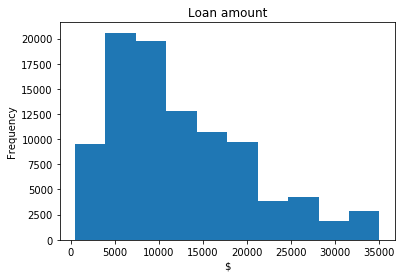

In [2]:
fig, ax = plt.subplots()
loan_amnt = loan["loan_amnt"]
ax.hist(loan_amnt)
ax.set_title("Loan amount")
ax.set_ylabel("Frequency")
ax.set_xlabel("$")
pd.DataFrame(loan_amnt).describe()

# Repaid vs Loan Amount: 
In analyzing the repaid feature verse the loan amount feature, we see that whether or not the loans were repaid are not really affected by the loan amount. Therefore, using the loan amounts to predict whether the loans will be repaid is not necessarily a determining factor. Both plots, showing the variance in the loans that were repaid and that were not repaid, have a pretty similar variance, although the variance is minimally greater for loans that are not repaid.

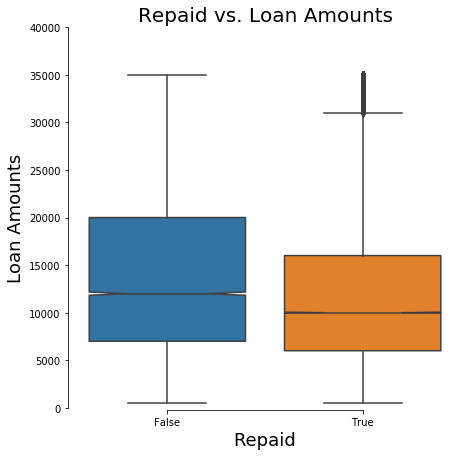

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(ax = ax, x='repaid', y='loan_amnt', data=loan, notch=True)
ax.set_ylim(0, 40000)
ax.set_xlabel('Repaid', fontsize=18)
ax.set_ylabel('Loan Amounts', fontsize=18)
ax.set_title('Repaid vs. Loan Amounts', ha='center', fontsize=20)
sns.despine(ax=ax, offset=2, trim=True)

# Term
We chose term amount to be one of our 5 features because we believe that different payment schedules might affect repayment and return differently. Term is defined as the period of time that a loan needs to be repaid. In analyzing the histogram of term, which plots the term feature, as well as the descriptive statistics, we found a few interesting points within the data. First, the data has only two values, either 36 months or 60 months, with no outliers. Second, there are more 36 months loans than 60 months loans. Lastly, there are not too many missing values from the loan amount data, which will be useful in helping us make future predictions.

,term
count,95902
unique,2
top,36 months
freq,75004


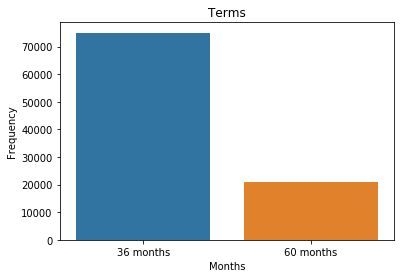

In [4]:
fig, ax = plt.subplots()
term = loan["term"]
sns.countplot(term)
ax.set_title("Terms")
ax.set_xlabel("Months")
ax.set_ylabel("Frequency")
pd.DataFrame(term).describe()

# Return vs. Term:
In analyzing the term feature verse the return feature, we can see that a 60 month loan is much more risky than a 30 month loan, due to the greater variance of the 60 month loan. However, there is not much difference between the return of the loan for either the 30 or 60 months because the median is roughly the same between the two. 

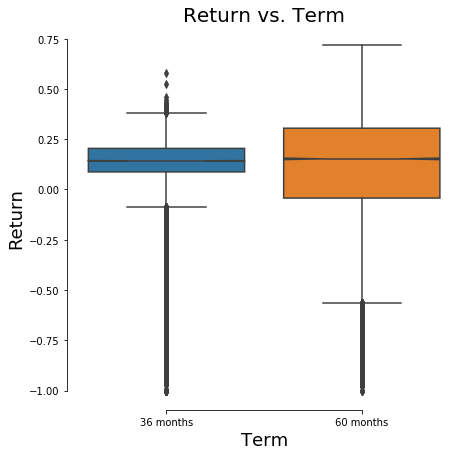

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(ax = ax, x='term', y='return', data=loan, notch=True)
ax.set_xlabel('Term', fontsize=18)
ax.set_ylabel('Return', fontsize=18)
ax.set_title('Return vs. Term', ha='center', fontsize=20)
sns.despine(ax=ax, offset=2, trim=True)

# Interest Rate

We decided to include the interest rate as one of our five features in this analysis because the interest rate on a loan can have a significant effect on whether or not a loan will be repaid. The interest rate is the cost to borrow money and also reflects how the economy is doing. An interest rate is a very important feature in regards to a loan because without it, individuals or banks would not be willing to lend money in the first place. The higher the interest rate, the greater the possibility of default on the loan. Thus, the probability of the loan being repaid becomes lower. We can use this understanding to help better predict the probability that the loans will be repaid for the Lending Club. Additionally, as the interest rate increases, the higher the likelihood that individuals will not want to take out loans in the future. A larger interest rate would also signal that the return on the loan is higher, decreasing the probability that the borrower will actually be able to repay the loan. Thus, we can also take our analysis of the interest rate into account when determining what type of return the Lending Club can expect.

Furthermore, in analyzing our histogram, which plots the interest rate feature, as well as the descriptive statistics, we see a few interesting points within the data. First, while there are no gaps between points on the histogram to suggest any extreme outliers, there are certain interest rate percentages that appear at the very far end of our histogram. This shows that there are much fewer loans with a 25% interest rate compared to the rest of the dataset. Next, much of the data seems to be clumped somewhere between the 7.5% and 17.5% interest rates, suggesting a 10% range among the majority of the data. However, the histogram suggests that the bulk of the loans in this dataset have a 12.5% interest rate. Additionally, in analyzing the descriptive statistics of the interest rate feature, we can see that the average interest rate is about 12.98%. We can therefore use this data to see which loans have a higher than average interest rate and use this in determining the probability that the loan will be repaid. Lastly, there are not too many missing values from the loan amount data, which will be useful in helping us make future predictions.

,int_rate
count,95902.000000
mean,12.984599
std,4.155560
min,5.420000
25%,9.990000
50%,13.060000
75%,15.700000
max,24.890000


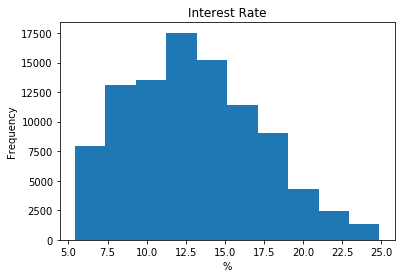

In [6]:
fig, ax = plt.subplots()
int_rate = loan["int_rate"]
ax.hist(int_rate)
ax.set_title("Interest Rate")
ax.set_ylabel("Frequency")
ax.set_xlabel("%")
pd.DataFrame(int_rate).describe()

# Repaid vs. Interest Rate:
In analyzing the interest rate feature against the repaid feature, we can see that the interest rate does not have a huge effect on whether the loan will be repaid or not. The variances of the repaid feature, based on whether or not it was repaid, shows a similar variance between the two factors. Although the median was lower for loans that were repaid compared to loans that were not repaid, the minimum and maximum amounts of the interest rate were also very similar. Therefore, there may be a small correlation between the interest rate and whether the loans will be repaid. 

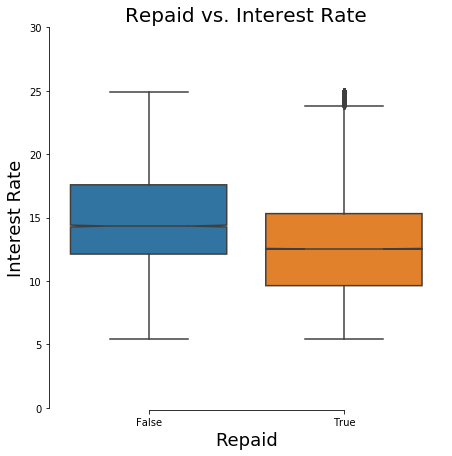

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(ax = ax, x='repaid', y='int_rate', data=loan, notch=True)
ax.set_ylim(0, 30)
ax.set_xlabel('Repaid', fontsize=18)
ax.set_ylabel('Interest Rate', fontsize=18)
ax.set_title('Repaid vs. Interest Rate', ha='center', fontsize=20)
sns.despine(ax=ax, offset=2, trim=True)

# Grade

We decided to include the grade of the loans as one of our five features in this analysis because this rating relates to risk and is based on the likelihood that the loan will be repaid, which is one of the main goals of this analysis. The Lending Club assigns each loan a grade of either A, B, C, D, E, F or G. The lower the grade of the loan, such as a grade F, the risker the loan. This means that there is a greater chance that the loan will not be repaid. We can analyze the number of loans that have lower grades and use it to predict the probability of which loans will be repaid. Thus, we can expect that loans with a lower grade are less likely to be repaid because there is a higher chance of default and more risk. 

Additionally, in analyzing the histogram, which plots the frequency of each assigned loan grade within this dataset, we can note a few interesting points. First, we can see that the majority of the loans have an assigned grade of B. A loan grade of B is relatively less risky which is a positive sign, indicating that we may be able to predict that the majority of loans get repaid as there is less risk with a grade B loan. Furthermore, the second and third largest number of loans shown in the histogram have a grade of A, followed by C. This would positively suggest that most loans will be repaid as the majority of them have a higher loan grade. Thus, the data are more clumped around the A, B and C loan grades. However, there are very few loans with a grade G, suggesting that these may be outliers in the data. Lastly, since this feature is a categorical piece of data, we were able to determine that, as mentioned above, the loan grade B had the highest frequency as part of our descriptive statistics. 


,grade
count,95902
unique,7
top,B
freq,30896


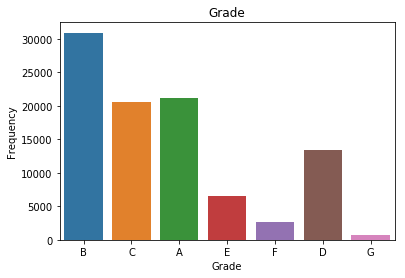

In [8]:
fig, ax = plt.subplots()
grade = loan["grade"]
ax = sns.countplot(grade)
ax.set_title("Grade")
ax.set_ylabel("Frequency")
ax.set_xlabel("Grade")
pd.DataFrame(grade).describe()

# Return vs. Grade
In analyzing the grade feature against the return feature, we can see that there is a vast difference in the effects a lower grade has on the return of the loans compared to a higher grade. The higher the grade, the lower the interest rate and the smaller the variance in the return. The higher grades, including A, B, C, D and E all had a return of 0 or above as a positive return. However the lower grades, such as F and G had a much larger variance, in which the return was affected, falling in both the positive and negative range. These lower grades have a higher interest rate, therefore, the loans that got repaid had a higher return. However, loans with a lower grade also had returns in the negative range. Thus, the grade of the loan may be strongly related to the return of the loan.

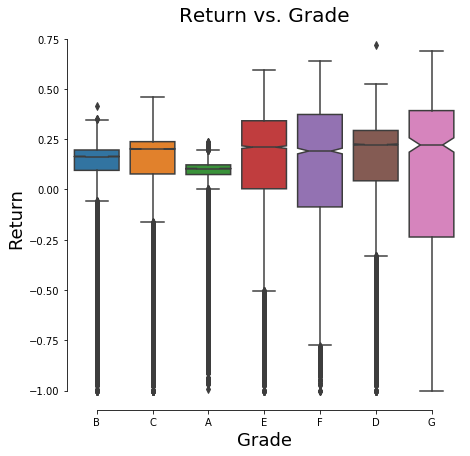

In [9]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(ax = ax, x='grade', y='return', data=loan, notch=True)
ax.set_xlabel('Grade', fontsize=18)
ax.set_ylabel('Return', fontsize=18)
ax.set_title('Return vs. Grade', ha='center', fontsize=20)
sns.despine(ax=ax, offset=2, trim=True)

# Annual Income
We decided to include annual income as an important feature in our analysis because we believe that it will have a strong influence on borrower’s repayment ability, and thus affecting probability of repayment and return of the loan. In analyzing our histogram, which plots the annual income, as well as the descriptive statistics, we found that there were potential outliers so we kept the data that is within 3 standard deviations.

,annual_inc
count,95222.000000
mean,66836.538348
std,36018.469611
min,1896.000000
25%,42000.000000
50%,60000.000000
75%,82296.000000
max,252361.000000


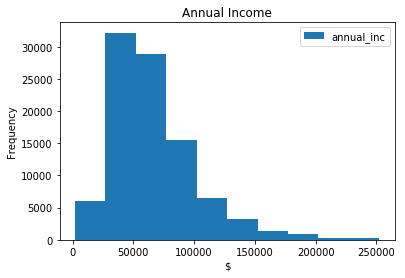

In [10]:
annual_inc = loan[['annual_inc']]
annual_inc = annual_inc.dropna()
# Keep the data that is within 3 standard deviation of the mean
annual_inc = annual_inc[np.abs(annual_inc.annual_inc-annual_inc.annual_inc.mean())<=(3*annual_inc.annual_inc.std())]

ax = annual_inc.plot.hist()
ax.set_title("Annual Income")
ax.set_ylabel("Frequency")
ax.set_xlabel("$")
annual_inc.describe()

# Repaid vs. Annual Income:
In analyzing the annual income feature against the repaid feature, we can see that the annual income does not have a large impact on whether the loans will be repaid or not. This is because the variance is roughly the same between the loans that were repaid compared to the loans that were not repaid. However, the variance is minimally greater for loans that were repaid. Therefore, the annual income is not the most important feature to predict whether the loans will be repaid.

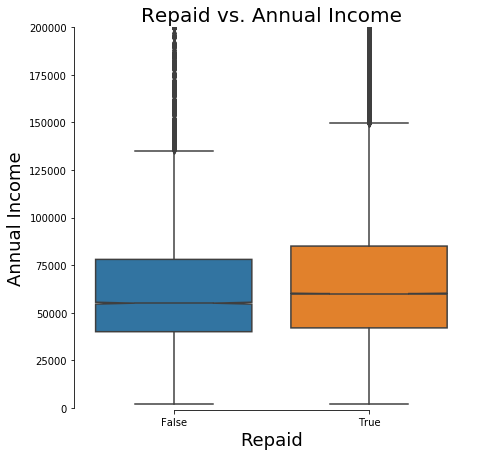

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(ax = ax, x='repaid', y='annual_inc', data=loan, notch=True)
ax.set_ylim(0, 200000)
ax.set_xlabel('Repaid', fontsize=18)
ax.set_ylabel('Annual Income', fontsize=18)
ax.set_title('Repaid vs. Annual Income', ha='center', fontsize=20)
sns.despine(ax=ax, offset=2, trim=True)

# Fit a Normal Distirbution to Histogram and QQ Plot for Return and Repaid
In this section, we created histograms for the Repaid and Return features respectively and fit a normal distribution to each of them. As can be seen from the graphs, the Return feature is pretty normally distributed while the Repaid feature is not. The distribution of Return feature is in a bell shape, with a mean that is close to zero and most results situated at it or to its right. Since the mean is not equal to zero, it is not a standard normal distribution. The distribution of Repaid feature, on the other hand, does not show a normal distribution because it only have two values, either True or False, therefore, its distribution is showed as two straight lines connected together.

We also include a QQ plot for the Return feature to further identify if data is normally distributed. Both sets of quantities came from the same distribution if the points form a line that is roughly straight. However, from the QQ plot we have we can see that our points does not form a straight line. Instead, it has points that fall along a line in the middle and upper right of the graph, but curve off in the lower left side. It indicates that our data have some extreme values in the lower area. In addition, points in this QQ points start out on the left side of the line, then some move to the other side, and later move back and form a straight line. Such fluctuation suggests that the data has some degree of skewing to the right, which is consistent with our normal distribution result to the Return histogram.

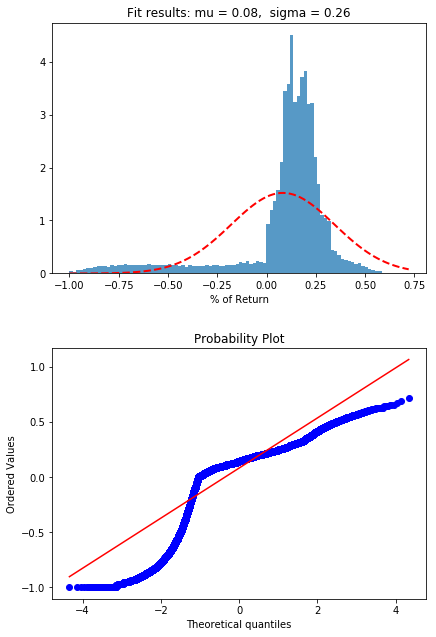

In [12]:
#data cleaning
data = loan["return"]
data = data.dropna()

f, (ax1, ax2) = plt.subplots(2, 1)
f.tight_layout()
plt.subplots_adjust(top = 3, bottom = 1)

(mu, sigma) = norm.fit(data)
n, bins, patches = ax1.hist(data,100, normed=1, alpha=0.75)
title = "Fit results: mu = %.2f,  sigma = %.2f" % (mu, sigma)
ax1.set_title(title)
ax1.set_xlabel("% of Return")

y = mlab.normpdf(bins, mu, sigma)
l = ax1.plot(bins, y, 'r--', linewidth=2)

ax2 = stats.probplot(data, dist="norm", plot=pylab)

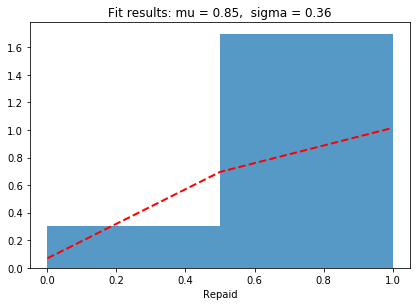

In [13]:
data = loan["repaid"]
data = data.dropna()

f, ax = plt.subplots()
f.tight_layout()

(mu, sigma) = norm.fit(data)
n, bins, patches = ax.hist(data, 2, normed=1, alpha=0.75)
title = "Fit results: mu = %.2f,  sigma = %.2f" % (mu, sigma)
ax.set_title(title)
ax.set_xlabel("Repaid")

y = mlab.normpdf(bins, mu, sigma)
l = ax.plot(bins, y, 'r--', linewidth=2)


# Machine Learning
Before we started doing any machine learning analysis, we preprocessed our selected five features appropriately. We did not make any changes to loan amount, interest rate and annual income because they are already numerical and are ready for use. We then converted our term feature into float, i.e. 36 months will become 36.00. For our categorical feature, grade, we imported a class called LabelBinarizer from sklearn.preprocessing to transform our multi-class labels to binary labels. We then filled out missing data in our data frame by importing another class called Imputer from sklearn.preprocessing. We use it to help replace missing values using the mean along the column which will not change the sample means for our features. After dealing with missing values, we did data normalization to standardize the range of features so that they are approximately proportionately to the final distance and are processed much faster in our later analysis. Lastly, we randomly split our data into Training and Testing data sets for modeling and regression.

In [14]:
### Data Preprocessing ###
features = loan[["loan_amnt","int_rate"]]

#add the preprocessed annual_inc into the current features
features["annual_inc"] = annual_inc

#encode the term feature
term = [float(d[:2]) for d in loan["term"]] #convert term to float i.e "60 months" to 60
features["term"] = term #add a new column to the current dataframe

#encode the grade feature
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
grade = lb.fit_transform(loan["grade"])

#fill NaN data
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0, copy=False)
features = imp.fit_transform(features)
labels = imp.fit_transform(loan[['repaid']])

#Scale the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(copy=False)
ss.fit_transform(features)

#put them into a dataframe
features = np.column_stack((features,grade)) #adds the grades into the exisiting features
features = pd.DataFrame(features)
features.columns =["loan_amnt","int_rate","annual_inc", "term"] + ["grade_{}".format(v) for v in lb.classes_]
feature_names = features.columns # we use this for titling residual plots later
labels = pd.DataFrame(labels)
labels.columns = ["Repaid"]
print("features\n")
print(features.head())
print(45*"-")
print("labels\n")
print(labels.head())

#split into trainning and testing data
from sklearn.model_selection import train_test_split 
test_size = 0.5
random_state = 0
d_train, d_test, l_train, l_test =train_test_split(features, labels,test_size=test_size, random_state=random_state)

features

   loan_amnt  int_rate  annual_inc      term  grade_A  grade_B  grade_C  \
0  -0.939974 -0.561804   -1.193539 -0.527850      0.0      1.0      0.0   
1  -1.257118  0.549965   -1.026363  1.894479      0.0      0.0      1.0   
2  -1.269804  0.716008   -1.520869 -0.527850      0.0      0.0      1.0   
3  -0.305686  0.121621   -0.491400 -0.527850      0.0      0.0      1.0   
4  -1.193690 -0.070893    0.366769  1.894479      0.0      1.0      0.0   

   grade_D  grade_E  grade_F  grade_G  
0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      0.0  
4      0.0      0.0      0.0      0.0  
---------------------------------------------
labels

   Repaid
0     1.0
1     0.0
2     1.0
3     1.0
4     1.0


# Classification


In [15]:
### Using Classifiers ###
import sklearn.metrics
def performance_metrics():
    #print the additional performance metrics
    print("Precision: {:.2f}%".format(sklearn.metrics.precision_score(l_test, l_predict)*100))
    print("Accuracy: {:.2f}%".format(sklearn.metrics.accuracy_score(l_test, l_predict)*100))
    print("Recall: {:.2f}%".format(sklearn.metrics.recall_score(l_test, l_predict)*100))
    print("F1 Score: {:.2f}%".format(sklearn.metrics.f1_score(l_test, l_predict)*100))
    return None

#K-NN Classifier
from sklearn.neighbors import KNeighborsClassifier
k = 5
knc = KNeighborsClassifier(n_neighbors=k)
knc = knc.fit(d_train,l_train)
knc_score = knc.score(d_test, l_test)
print("KNeighbors Classifier Score: {:.2f}%".format(knc_score*100))
#confusion matrix
from sklearn.metrics import confusion_matrix
l_predict = knc.predict(d_train)
knc_cm = confusion_matrix(l_test, l_predict)
print("KNeighbors Classifier Confusion Matrix: \n{}".format(knc_cm))
performance_metrics()
print(45*"-")


#SVM classifier
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state = random_state)
svc = svc.fit(d_train,l_train)
svc_score = svc.score(d_test, l_test)
print("SVM Classifier Score: {:.2f}%".format(svc_score*100))
#confusion matrix
l_predict = svc.predict(d_train)
svc_cm = confusion_matrix(l_test, l_predict)
print("SVM Classifier Confusion Matrix: \n{}".format(svc_cm))
performance_metrics()
print(45*"-")


#Decision Tree classfier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = random_state)
dtc = dtc.fit(d_train,l_train)
dtc_score = dtc.score(d_test, l_test)
print("Decision Tree Classifier Score: {:.2f}%".format(dtc_score*100))
#confusion matrix
l_predict = dtc.predict(d_train)
dtc_cm = confusion_matrix(l_test, l_predict)
print("Decision Tree Classifier Confusion Matrix: \n{}".format(dtc_cm))
performance_metrics()


KNeighbors Classifier Score: 82.83%
KNeighbors Classifier Confusion Matrix: 
[[  390  6825]
 [ 2126 38610]]
Precision: 84.98%
Accuracy: 81.33%
Recall: 94.78%
F1 Score: 89.61%
---------------------------------------------
SVM Classifier Score: 84.95%
SVM Classifier Confusion Matrix: 
[[    0  7215]
 [    0 40736]]
Precision: 84.95%
Accuracy: 84.95%
Recall: 100.00%
F1 Score: 91.86%
---------------------------------------------
Decision Tree Classifier Score: 75.02%
Decision Tree Classifier Confusion Matrix: 
[[ 1183  6032]
 [ 6404 34332]]
Precision: 85.06%
Accuracy: 74.07%
Recall: 84.28%
F1 Score: 84.67%


|  | |
| --- |--- |
| True  Negative (**TN**)| False Positive (**FP**)|
| False Negative (**FN**)| True Positive (**TP**)|

| | | |
| -- | -- | -- |
| Precision |  Positive Predictive Value | $\frac{TP}{TP + FP}$ |
| Accuracy |   | $\frac{TP + TN}{TP  + TN + FP + FN}$ |
| Recall (Sensitivity) |  True Positive Rate | $\frac{TP}{TP + FN}$ |
| F1-score ($F_1$)|  Harmonic mean of Precision and Recall | $\frac{2TP}{2TP + FN + FP}$ |
| Specificity |  True Negative Rate | $\frac{TN}{TN + FP}$ |
| False Positive Rate (Fall Out)|  FPR | $\frac{FP}{FP + TN}$ |
| False Discovery Rate |  FDR | $\frac{FP}{FP + TP}$ |

Bar graphs to visualize all the FP FN TP TN


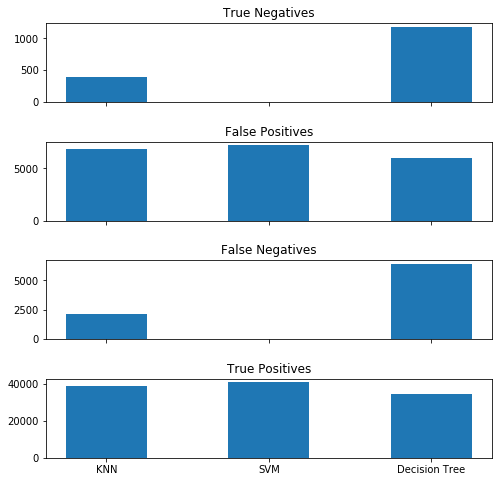

In [16]:
### Bar graphs to represent FP FN TP TN

# get the values from the confusion matrices
knc_tn,knc_fp,knc_fn,knc_tp = knc_cm.flatten()
svc_tn,svc_fp,svc_fn,svc_tp = svc_cm.flatten()
dtc_tn,dtc_fp,dtc_fn,dtc_tp = dtc_cm.flatten()
true_negatives = knc_tn, svc_tn, dtc_tn
false_positives = knc_fp, svc_fp, dtc_fp
false_negatives = knc_fn, svc_fn, dtc_fn
true_positives = knc_tp, svc_tp, dtc_tp

#plot it
fig, axarr = plt.subplots(4, sharex=True, figsize=(8,8))
x = range(3)
width = 0.5
plt.subplots_adjust(hspace=0.5)
plt.xticks(x, ("KNN", "SVM", "Decision Tree"))
axarr[0].bar(x,true_negatives,width)
axarr[0].set_title("True Negatives")
axarr[1].bar(x,false_positives,width)
axarr[1].set_title("False Positives")
axarr[2].bar(x,false_negatives,width)
axarr[2].set_title("False Negatives")
axarr[3].bar(x,true_positives,width)
axarr[3].set_title("True Positives")
print("Bar graphs to visualize all the FP FN TP TN")

In [17]:
### Computing ROC curve and AUC ###
from sklearn.metrics import roc_curve, auc

# KNeighbors Classifier
y_score_knc = knc.predict_proba(d_test)[:, 1] #Grab positive class probability
fpr_knc, tpr_knc, thresholds = roc_curve(l_test, y_score_knc)
roc_auc_knc = auc(fpr_knc, tpr_knc)

#SVM classifier
y_score_svc = svc.decision_function(d_test) #Grab positive class probability
fpr_svc, tpr_svc, thresholds = roc_curve(l_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

#Decision Tree classifier
y_score_dt = dtc.predict_proba(d_test)[:, 1] #Grab positive class probability
fpr_dt, tpr_dt, thresholds = roc_curve(l_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

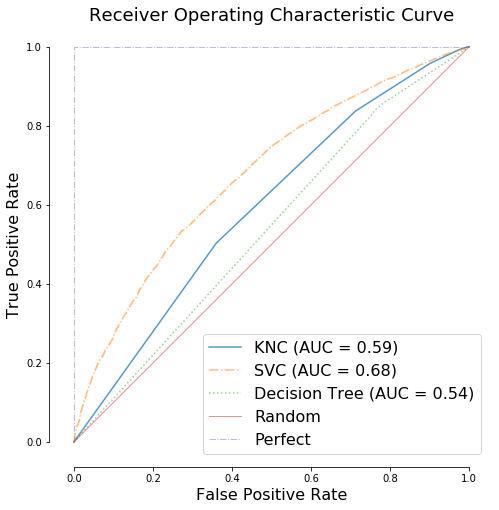

In [18]:
### Plotting the curves ###
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fpr_knc,tpr_knc, alpha = 0.75, linestyle='-' , label = "KNC (AUC = {:.2f})".format(roc_auc_knc))
ax.plot(fpr_svc,tpr_svc, alpha = 0.5,  linestyle='-.', label = "SVC (AUC = {:.2f})".format(roc_auc_svc))
ax.plot(fpr_dt,tpr_dt,   alpha = 0.5,  linestyle=':' , label = "Decision Tree (AUC = {:.2f})".format(roc_auc_dt))

ax.plot([0, 1], [0, 1], alpha = 0.5,lw=1, linestyle='-', label='Random')
ax.plot([0, 0, 1], [0, 1, 1], alpha = 0.5, lw=1, linestyle='-.', label='Perfect')

# Decorate plot appropriately
ax.set_title('Receiver Operating Characteristic Curve', fontsize=18)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect('equal')
ax.legend(loc=4, fontsize=16)
sns.despine(offset=5, trim=True)

# Choosing The Best Classifer
After using K-Nearest Neighbor, Support Vector Machine, and Decision Tree classifiers, we decided that the SVM classifier is the best among all. The Support Vector Machine classifier has the highest in mean accuracy and all the measures computed by using the confusion matrix. The confusion matrix provides all the true and false negatives as well as true and false positives. One example to use the confusion matrix is to compute the Precision which is the percent of true positives of true and false positives. Lastly, we computed the ROC curve for all 3 classifiers, and the Support Vector Machine classifier (SVC) is the closest to the line y=x with area under the curve of 68%. All classifiers are above the “random” curve, indicating that they are all better than random in label classification (repaid and not repaid). Therefore, SVC performs better than other types of measurement such as mean accuracy, confusion matrix, and area under curve. 

# Regression
Before performing machine learning with regression, we did the same task of preprocessing as we did for classification. Our regression models use the same features as classification. These features are independent variables and labels are dependent variables. Missing values are filled with the mean for our dependent variable: return. As the output shown below, we are using the independent variables to build a model to predict the return for a loan. After finishing handling the data, we split it into two sets: training and testing. For plotting purposes, we turned the dataframes into matrices after printing the them. 

In [19]:
# use the same features
print("Independent Variable\n")
print(features.head())
print(45*"-")

#Fill the NaN data 
labels = imp.fit_transform(loan[['return']])
labels = pd.DataFrame(labels)
labels.columns = ["return"]
print("Dependent Variable\n")
print(labels.head())


#turn df to matrix for plotting purposes
labels = labels.as_matrix()
features = features.as_matrix()

#split into trainning and testing data
test_size = 0.5
random_state = 0
d_train, d_test, l_train, l_test =train_test_split(features, labels,test_size=test_size, random_state=random_state)

Independent Variable

   loan_amnt  int_rate  annual_inc      term  grade_A  grade_B  grade_C  \
0  -0.939974 -0.561804   -1.193539 -0.527850      0.0      1.0      0.0   
1  -1.257118  0.549965   -1.026363  1.894479      0.0      0.0      1.0   
2  -1.269804  0.716008   -1.520869 -0.527850      0.0      0.0      1.0   
3  -0.305686  0.121621   -0.491400 -0.527850      0.0      0.0      1.0   
4  -1.193690 -0.070893    0.366769  1.894479      0.0      1.0      0.0   

   grade_D  grade_E  grade_F  grade_G  
0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      0.0  
4      0.0      0.0      0.0      0.0  
---------------------------------------------
Dependent Variable

     return
0  0.172217
1 -0.596516
2  0.251521
3  0.222630
4  0.080723


In [20]:
from matplotlib import cm
def residuals_plots(d_train, l_train, d_test, l_test, results):
    residuals = (l_test-results)
    for idx in range(len(features[0])):
        fig, ax = plt.subplots()
        ax.scatter(d_test[:,idx], residuals, alpha = .5, cmap=cm.coolwarm)
        ax.set_xlabel(feature_names[idx])
        xlim_val = max(abs(d_test[:,idx].min()),abs(d_test[:,idx].max()))
        ax.hlines(0,-xlim_val, xlim_val, color="r", linestyle='--', alpha=0.25)

        ylim_val = max(abs(residuals.min()),abs(residuals.max()))
        ax.set_ylim(-ylim_val, ylim_val)
        ax.set_title("Residuals Plot")
        ax.set_ylabel("Residuals")

Multi Linear Regression
R Sqaured: 0.76%


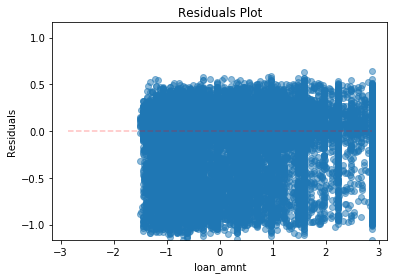

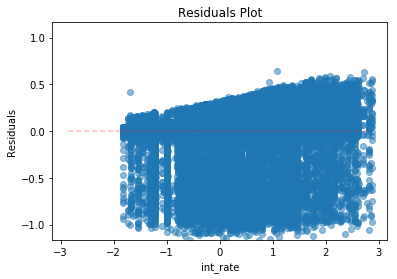

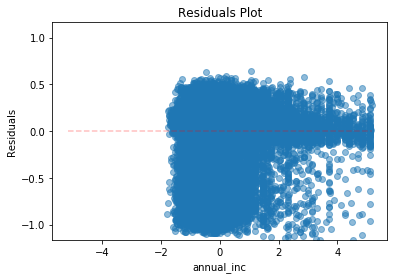

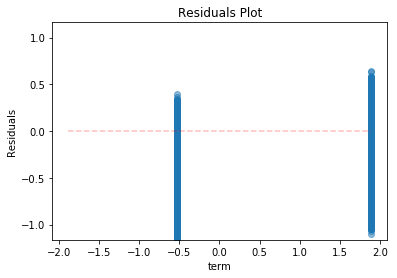

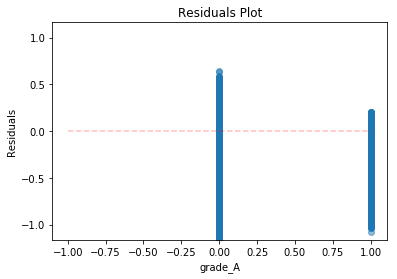

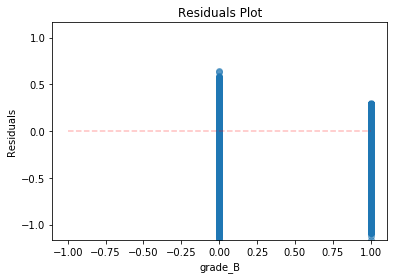

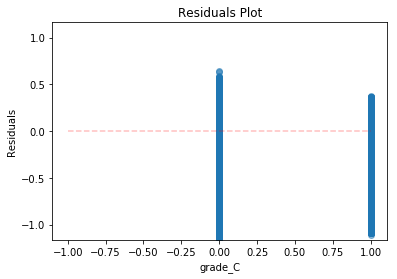

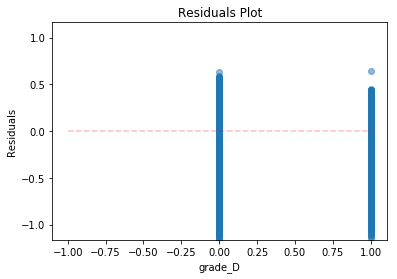

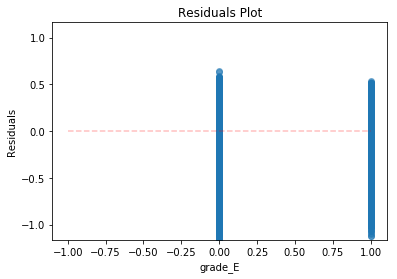

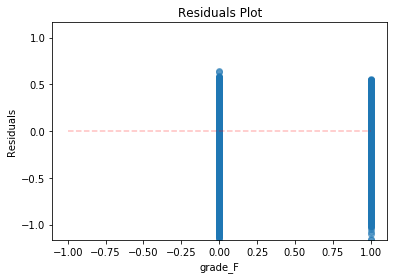

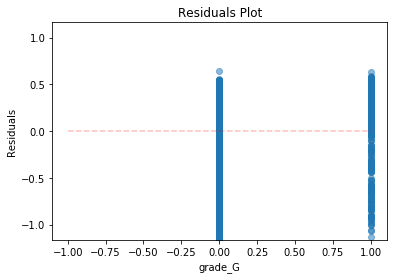

In [21]:
#Multi Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(d_train,l_train)
lr_score = lr.score(d_test,l_test)
results = lr.predict(d_test)
print("Multi Linear Regression")
print("R Sqaured: {:.2f}%".format(lr_score*100))
residuals_plots(d_train, l_train, d_test, l_test, results)

KNN regressor
R Sqaured: -17.62%


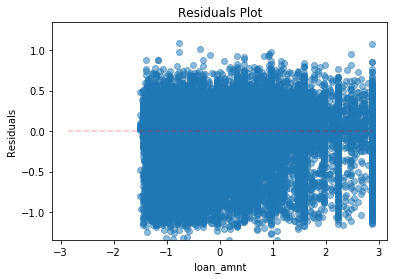

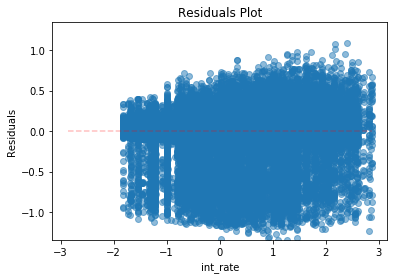

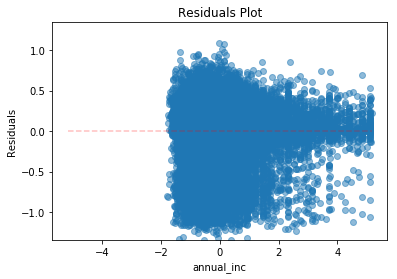

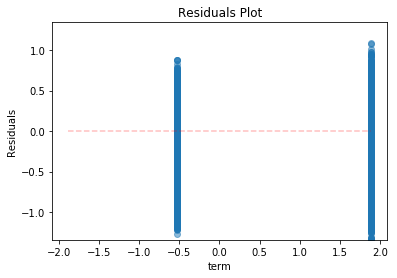

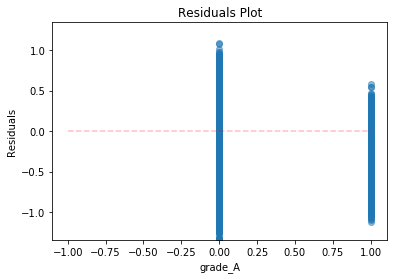

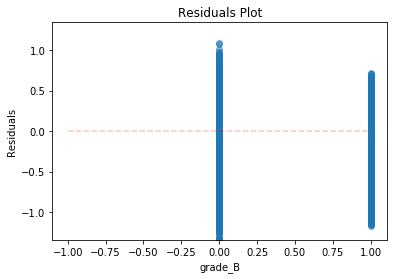

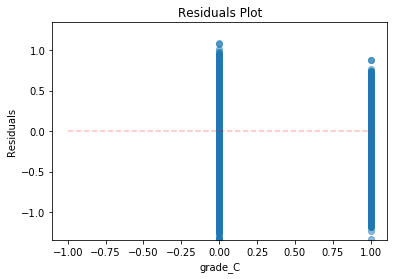

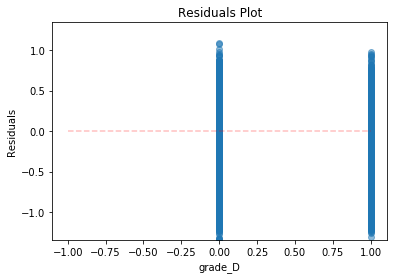

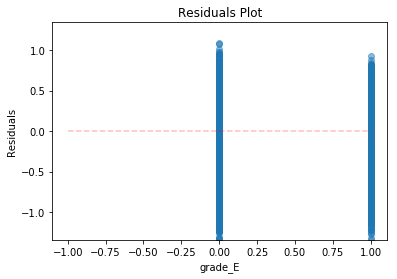

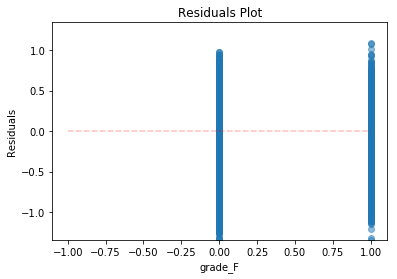

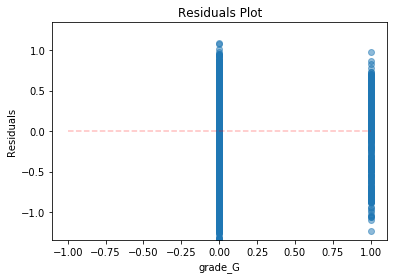

In [22]:
#KNN regressor
from sklearn.neighbors import KNeighborsRegressor
k = 5
knnr = KNeighborsRegressor(k)
knnr = knnr.fit(d_train, l_train)
knnr_score = knnr.score(d_test, l_test)
results = knnr.predict(d_test)
print("KNN regressor")
print("R Sqaured: {:.2f}%".format(knnr_score*100))
residuals_plots(d_train, l_train, d_test, l_test, results)

# Choosing The Best Regression Model
Wehn choosing the best regression model, we first examined the R squared then the residual plots. 

Multi-linear regression is 0.76% and KNN regressor is -17.62%. A negative R squaured is not mathemitically impossible or a bug. It means the predicted model is worse than simply fitting a horizonital line across the data points. The reason is that R sqaured is not always the square of anything, it can be calcuated in another way. For reference, we looked at [Stack Overflow][sof]

With the intuition of the R squared results, we expect the models to have a lot of errors, which is represented at the residual plots. Looking at the residual plots, the points are not randomly distributed and some of them seem to have patterns or create shapes. We also have a [reference][rp] for residual plots

After examination of the results, we would choose the Multi-linear model since it has a better R squared. We also considered that the residual plots for both models are similiar. In sum, the regression models are performing poorly and there is definately room for improvement. We can perform additional exploration in the features(independent variables) and choose the best ones. 

[sof]: https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative
[rp]: http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/



# Conclusion
When performing EDA, we struggled to create "decent" histograms and we learned that it is quite necessary to preprocess the data before analyzing them. Examples include handling outliers and empty cells. We found the annual income feature to be interesting since the histogram did not appear to be what we expected, and we realized that there are outliers that dragged the range of x-axis. Therefore, we fixed this issue and plotted a decent histogram.
						
When performing machine learning, it is also important to preprocess the data, and in this case we had to scale the data after handling outliers and empty cells.
						
As mentioned earlier, we used 3 classifiers and the most important was the Support Vector Machine. We considered measurements of the mean accuracy, confusion matrix, and area under curve. It is clear that the classifier is better than random since it has an area under the curve of 68% which is greater than random (50%).
						
We performed 2 regression tasks and decided that the multi-linear regression is the best when considering the R squared and residual plots. According to our poor R squared results, however, we conclude that the probability of repayment is fairly low and both models are not predicting return of the loan effectively.
						
When considering the importance of each feature in the classification, the more features provided to classify the labels, the better. However, too many features would likely overfit the model. In other words, the model might do well in the training dataset and, but cannot generalize in the training dataset.	
					
						
Similarly, providing many features or independent variables to predict the return might be ideal. However, some features might cause the model to perform better and some might make it worse. Therefore, it is important to consider every feature separately, and then decide which feature to include when building the regression model.
						
Based on our results for classification, we believe 68% is good enough to classify repaid or not repaid. In other words, the 5 features can perform well when distinguishing whether a loan would be repaid or not. The Lending Tree might want a higher percentage, and therefore the company should consider different or additional features to build another classifier.
						
In conclusion, we do not recommend the company to use these models since they performed poorly. We would inform them that they should not use the 5 features that we picked. As mentioned earlier, the company should consider every feature separately and decide which one to include when building a decent model. 
					